# About the Dataset

## Key Indicators of Heart Disease


### 2020 annual CDC survey data of 400k adults related to their health status
What topic does the dataset cover?
According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

### Where did the dataset come from and what treatments did it undergo?
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. As the CDC describes: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.". The most recent dataset (as of February 15, 2022) includes data from 2020. It consists of 401,958 rows and 279 columns. The vast majority of columns are questions asked to respondents about their health status, such as "Do you have serious difficulty walking or climbing stairs?" or "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]". In this dataset, I noticed many different factors (questions) that directly or indirectly influence heart disease, so I decided to select the most relevant variables from it and do some cleaning so that it would be usable for machine learning projects.

### What can you do with this dataset?
As described above, the original dataset of nearly 300 variables was reduced to just about 20 variables. In addition to classical EDA, this dataset can be used to apply a range of machine learning methods, most notably classifier models (logistic regression, SVM, random forest, etc.). You should treat the variable "HeartDisease" as a binary ("Yes" - respondent had heart disease; "No" - respondent had no heart disease). But note that classes are not balanced, so the classic model application approach is not advisable. Fixing the weights/undersampling should yield significantly betters results.


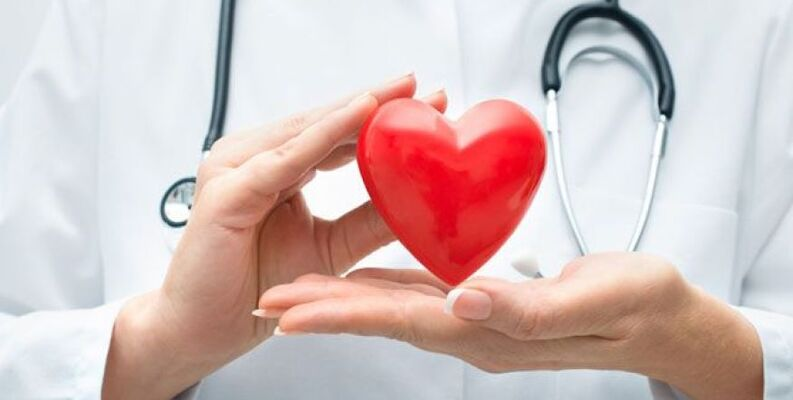

Columns of the Dataset are explained here :
- **HeartDisease** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- **BMI** : Body Mass index
- **Smoking** : Have you smoked at least 100 cigarettes in your entire life?
- **AlcoholDrinking** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- **Stroke** : (Ever told) (you had) a stroke?
- **PhysicalHealth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)
- **MentalHealth** : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)
- **DiffWalking** : Do you have serious difficulty walking or climbing stairs?
- **Sex** : Are you male or female?
- **AgeCategory** : Fourteen-level age category
- **Race** : Imputed race/ethnicity value
- **Diabetic** : (Ever told) (you had) diabetes?
- **PhysicalActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- **GenHealth** : Would you say that in general your health is (Good, very good ...)
- **SleepTime** : On average, how many hours of sleep do you get in a 24-hour period?
- **Asthma** : (Ever told) (you had) asthma?
- **KidneyDisease** : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- **SkinCancer** : (Ever told) (you had) skin cancer?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the Dataset

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Exploratory and Statistical analysis on the Dataset

Before starting the prediction task on this Dataset, it is important to collect as much knowledge as possible about the different attributes. In order to do that, we will run some statistical analysis and data visualization on our data.

In [4]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Our Dataset has already been cleaned before publishing it to Kaggle.

In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
for feature in df.columns:
    print(feature)
    print(df[feature].unique(),"\n")

HeartDisease
['No' 'Yes'] 

BMI
[16.6  20.34 26.58 ... 62.42 51.46 46.56] 

Smoking
['Yes' 'No'] 

AlcoholDrinking
['No' 'Yes'] 

Stroke
['No' 'Yes'] 

PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

DiffWalking
['No' 'Yes'] 

Sex
['Female' 'Male'] 

AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity
['Yes' 'No'] 

GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.] 

Asthma
['Yes' 'No'] 


Our Dataset has 4 quantitative variables and 14 qualitative attributes of which 10 are binary.
The target attribute "HeartDisease" is binary, therefore we're doing a binary classification.

Out of the 4 quantitative variables, "PhysicalHealth" , "MentalHealth" and "SleepTime" are discreate whereas "BMI" is continuous.

In [8]:
df.PhysicalHealth.value_counts()

0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0        85
24.0        67
26.0        66
23.0        46
19.0        35
Name: PhysicalHealth, dtype: int64

In [9]:
df.MentalHealth.value_counts()

0.0     205401
30.0     17373
2.0      16495
5.0      14149
10.0     10513
3.0      10466
15.0      9896
1.0       9291
7.0       5528
20.0      5431
4.0       5379
14.0      2048
25.0      1954
6.0       1510
8.0       1094
12.0       757
28.0       515
21.0       352
29.0       317
18.0       211
9.0        203
16.0       152
17.0       128
27.0       126
13.0       110
22.0        98
11.0        83
23.0        68
24.0        67
26.0        59
19.0        21
Name: MentalHealth, dtype: int64

In [10]:
df.SleepTime.value_counts()

7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

In [11]:
df.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

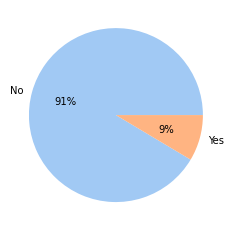

In [12]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df.HeartDisease.value_counts(),labels = list(df.HeartDisease.unique()),autopct='%.0f%%', colors=colors)
plt.show()

The rare occurence here is having a heart disease with only 9% (27,373 person out of 319,795). This means our Dataset is unbanlanced

## Data Visualization

### Splitting attributes by type

In [13]:
attributes = df.columns

Selecting binary attributes

In [14]:
binary_attributes = []

for feature in df.columns:
    if len(df[feature].unique()) == 2:
        binary_attributes.append(feature)

Selecting discrete attributes

In [15]:
discrete_attributes = attributes[~attributes.isin(binary_attributes+["BMI"])]

### Binary features analysis

In [16]:
def Draw_pie_chart(name_feature):

    fig,axes = plt.subplots(1,2,figsize=(15,8))
    labels = df[name_feature].unique()
    textprops = {"fontsize":15}

    axes[0].pie(df[df.HeartDisease=="No"][name_feature].value_counts(), labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[0].set_title('No Heart Disease',fontsize=15)
    axes[1].pie(df[df.HeartDisease=="Yes"][name_feature].value_counts(), labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[1].set_title('Yes Heart Disease',fontsize=15)

    plt.legend(title = name_feature, fontsize=15, title_fontsize=15)
    plt.show()

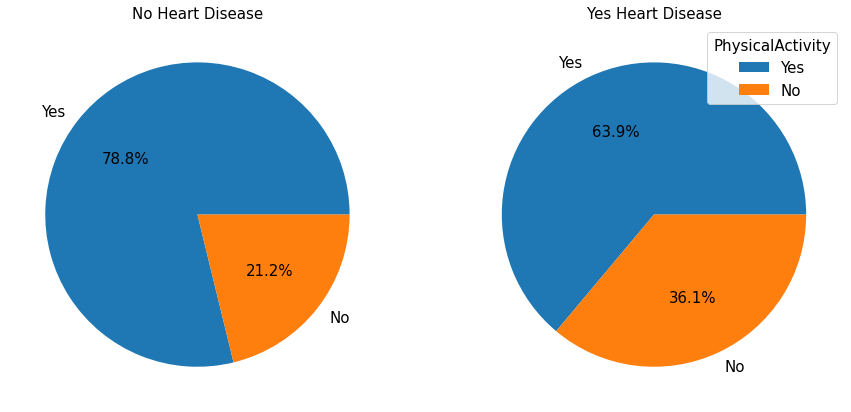

In [17]:
Draw_pie_chart("PhysicalActivity")

It is apparent that people with heart disease have less physicall activity reported in the last 30 days.

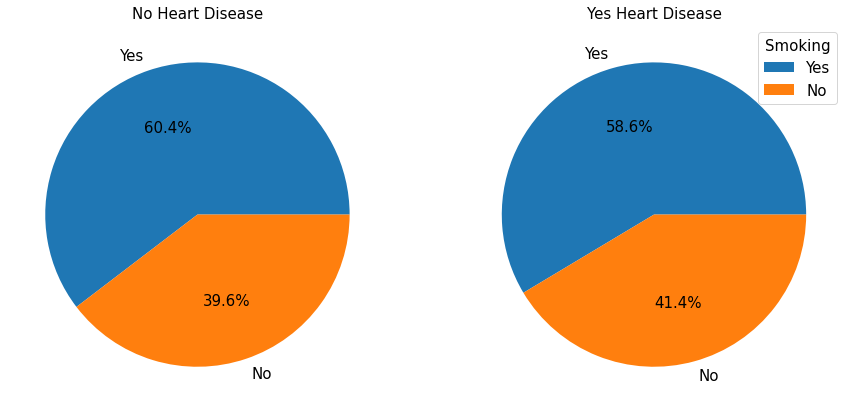

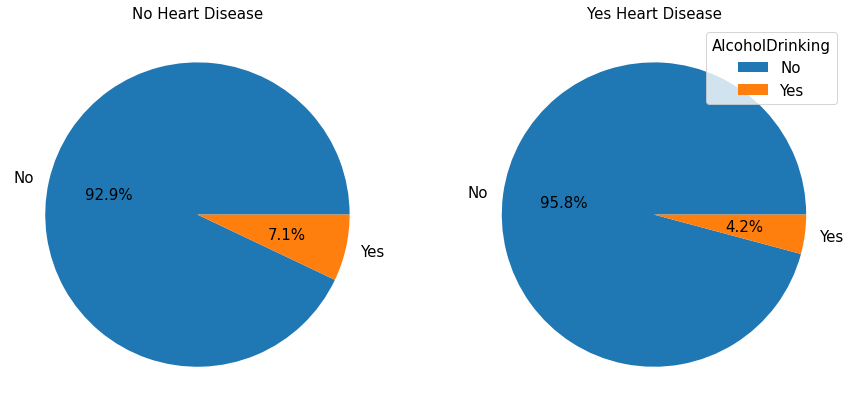

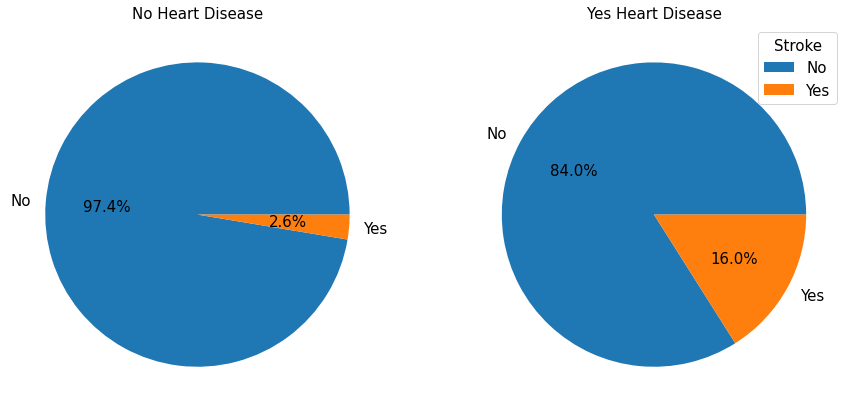

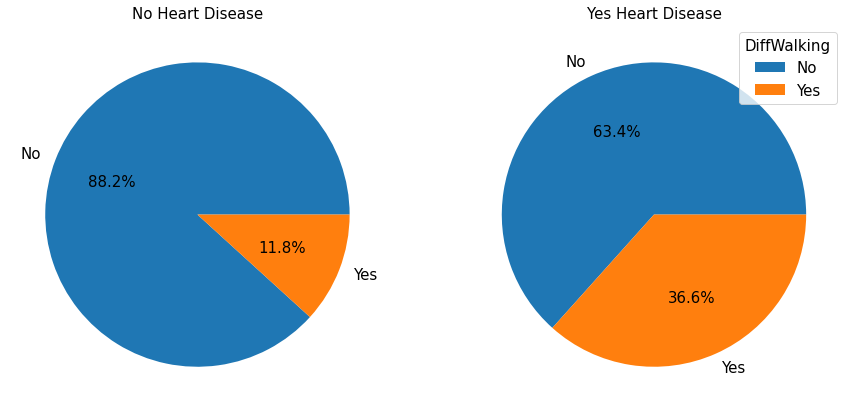

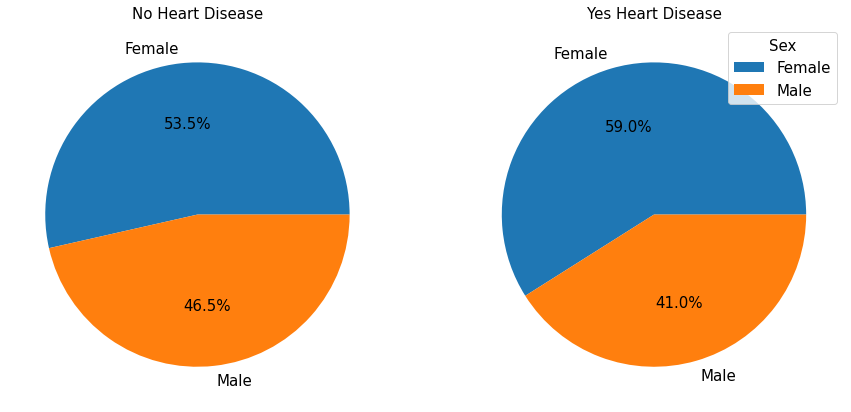

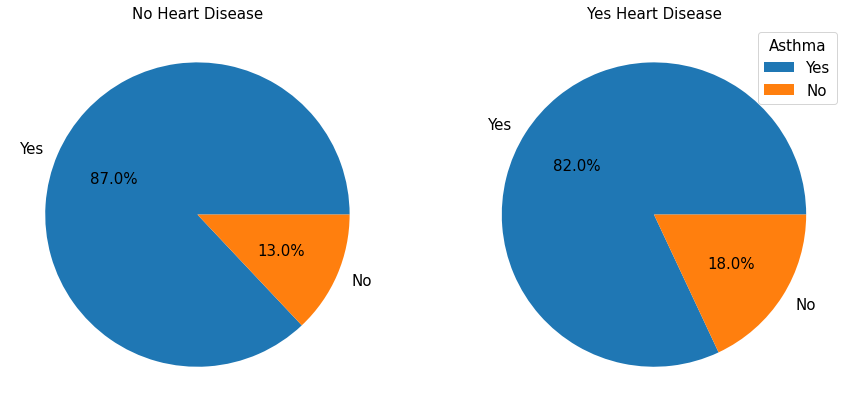

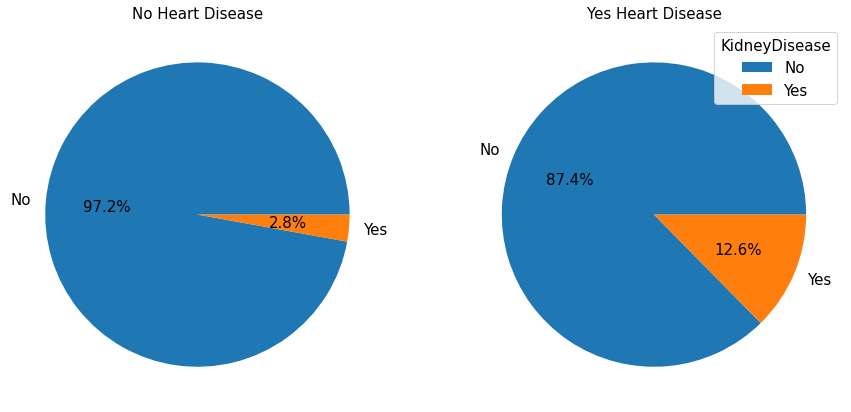

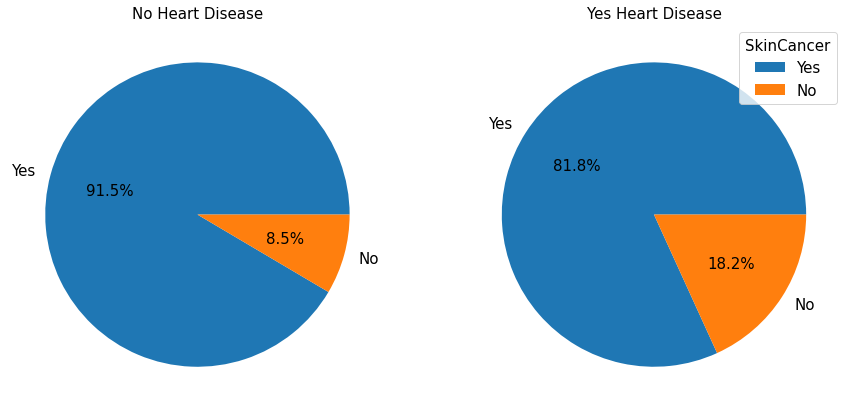

In [18]:
for feature in binary_attributes[1:]:
    if feature != "PhysicalActivity":
        Draw_pie_chart(feature)

Key takeaways :
- Smoking and Asthma has no significant effect on the heart disease
- Alocohol consumption is more provalent for people without heart disease
- People suffering from heart disease have had more strokes than normal individuals
- People with heart disease have had more difficulty walking
- 59% of individuals with heart disease are females
- Heart disease might also be linked to kidney disease and skin cancer

### Discrete attributes analysis

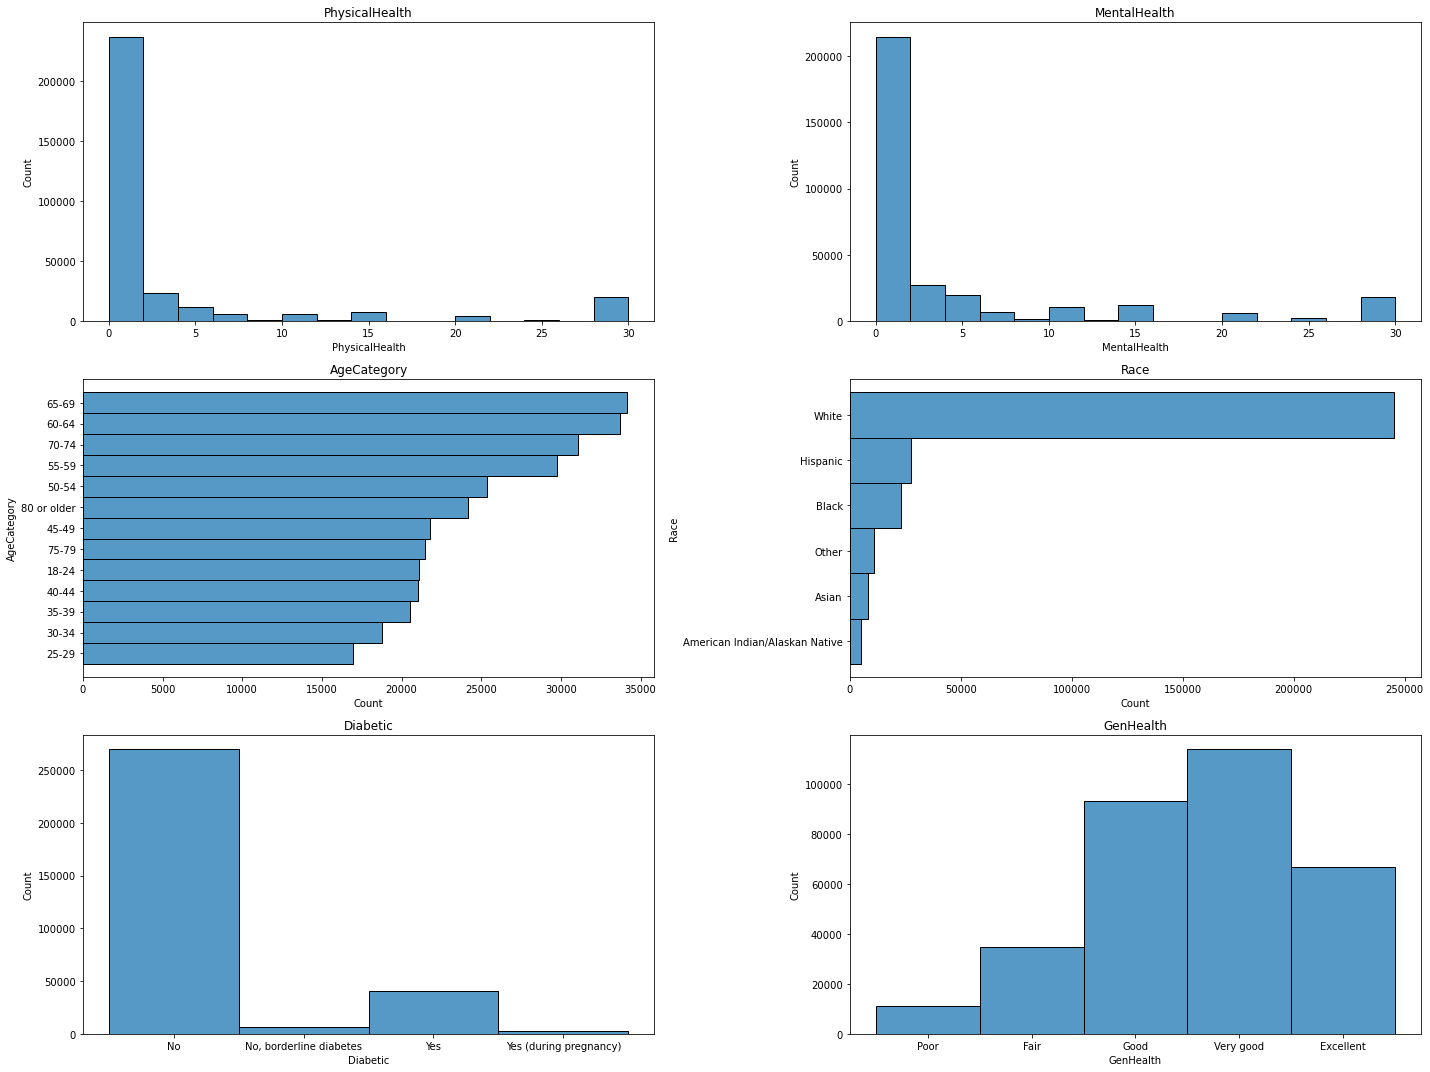

In [19]:
position_index = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
fig,axes = plt.subplots(3,2,figsize=(20,15))
for position, feature in zip(position_index, discrete_attributes):
    if len(df[feature].unique()) > 15:
        sns.histplot(ax=axes[position],bins = 15, data=df[feature].sort_values())
    else:
        if feature in ["AgeCategory", "Race"]:
            i, r = pd.factorize(df[feature])
            a = np.argsort(np.bincount(i)[i], kind='mergesort')[::-1]
            sns.histplot(ax=axes[position],y=df.iloc[a][feature])
        elif feature == "GenHealth":
            sns.histplot(ax=axes[position],data=pd.Categorical(df.GenHealth, categories=["Poor","Fair","Good","Very good","Excellent"], ordered=True))
            axes[position].set(xlabel=feature)
        else:
            sns.histplot(ax=axes[position],data=df[feature].sort_values())
    axes[position].set_title(feature)
        
fig.tight_layout()
plt.show()

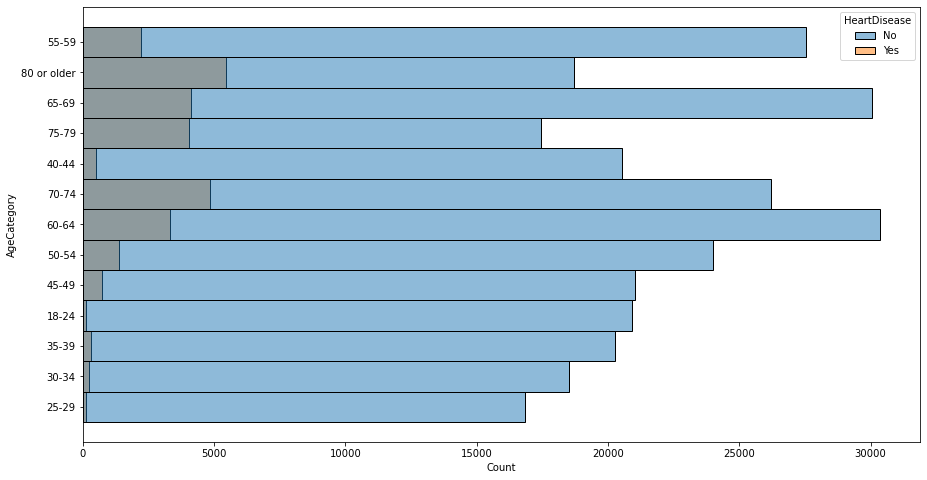

In [20]:
fig,axes = plt.subplots(figsize=(15,8))
i, r = pd.factorize(df["AgeCategory"])
a = np.argsort(np.bincount(i)[i], kind='mergesort')[::-1]
sns.histplot(ax=axes,data = df, y=df.iloc[a]["AgeCategory"],hue="HeartDisease")
plt.show()

We notice that Heart disease is linked with age. Eldery are more susceptible to having heart disease

### Continuous features analysis

In [21]:
def draw_density_plot(name_feature):
    fig,axes = plt.subplots(figsize=(15,8))
    sns.kdeplot(ax=axes,data=df_hd, x=continuos_feature[0], hue=name_feature,fill=True,bw_adjust=.8)
    plt.show()

In [22]:
# We only take categorical and discrete feature
combine_attributes = attributes[~attributes.isin(["BMI"])]

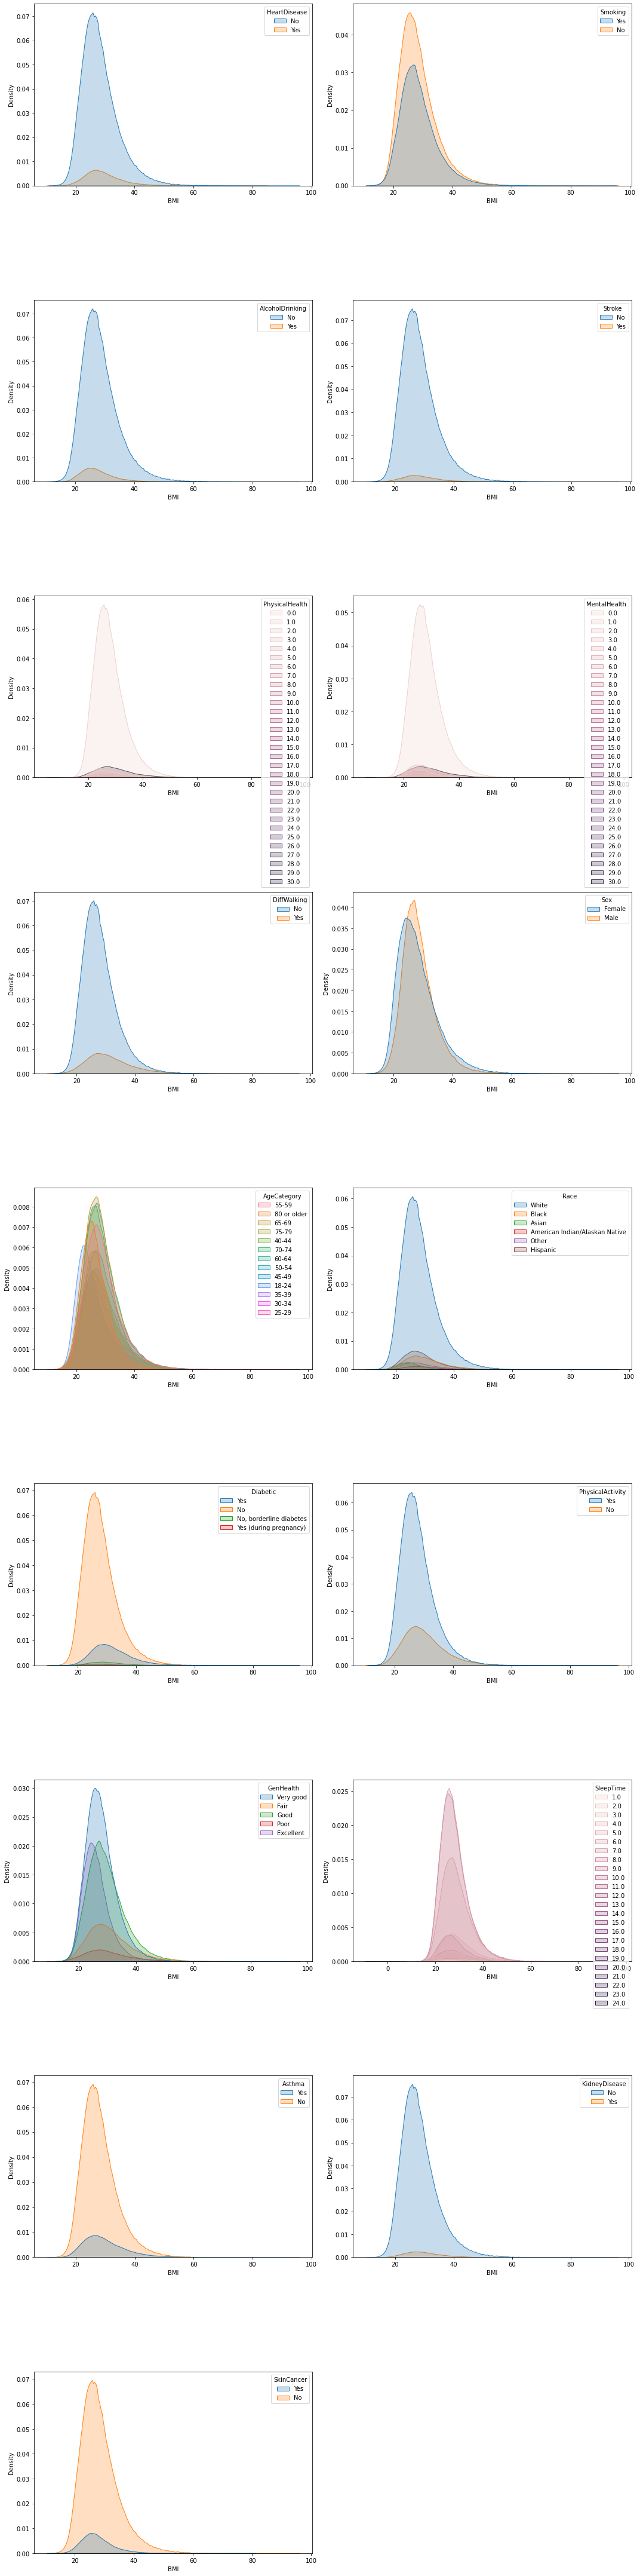

In [23]:
nrows, ncols = 9, 2

fig = plt.figure(figsize=(15,60))    
for position, name_feature in zip(range(1,18),combine_attributes):
    axes = fig.add_subplot(nrows, ncols, position)
    sns.kdeplot(ax=axes,data=df, x="BMI", hue=name_feature,fill=True,bw_adjust=.8)
    
fig.tight_layout()
plt.show()

## Correlation

In [24]:
corr = df.corr()
corr

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


Most our data is in the string format therefor out correlation matrix contains only 4 attributes. We have some categorical features that we will use **OneHotEncoder** to convert every modality to a binary format.

In [25]:
cat_features = []
num_features = []
for column, i in zip(df.columns, df.dtypes):
    if i == object:
        cat_features.append(column)
    else:
        num_features.append(column)

In [26]:
df_cat = df[cat_features].copy()

In [27]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns = cat_features)

In [28]:
df_numeric = pd.merge(df_cat_encoded, df[num_features],left_index=True, right_index=True)

In [29]:
df_numeric.head(10)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0,16.60,3.0,30.0,5.0
1,0.0,0.0,0.0,1.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,20.34,0.0,0.0,7.0
2,0.0,1.0,0.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0,26.58,20.0,30.0,8.0
3,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,0.0,0.0,1.0,24.21,0.0,0.0,6.0
4,0.0,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,23.71,28.0,0.0,8.0
5,1.0,1.0,0.0,0.0,1.0,0.0,11.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,28.87,6.0,0.0,12.0
6,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,0.0,1.0,1.0,1.0,0.0,1.0,21.63,15.0,0.0,4.0
7,0.0,1.0,0.0,0.0,1.0,0.0,12.0,5.0,2.0,0.0,2.0,1.0,0.0,0.0,31.64,5.0,0.0,9.0
8,0.0,0.0,0.0,0.0,0.0,0.0,12.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,26.45,0.0,0.0,5.0
9,0.0,0.0,0.0,0.0,1.0,1.0,9.0,5.0,0.0,1.0,2.0,0.0,0.0,0.0,40.69,0.0,0.0,10.0


In [30]:
corr_matrix = df_numeric.corr()
corr_matrix

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
HeartDisease,1.000000,0.107764,-0.032080,0.196835,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.041444,0.145197,0.093317,0.051803,0.170721,0.028591,0.008327
Smoking,0.107764,1.000000,0.111768,0.061226,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,0.024149,0.034920,0.033977,0.023118,0.115352,0.085157,-0.030336
AlcoholDrinking,-0.032080,0.111768,1.000000,-0.019858,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.002202,-0.028280,-0.005702,-0.038816,-0.017254,0.051282,-0.005065
Stroke,0.196835,0.061226,-0.019858,1.000000,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.038866,0.091167,0.048116,0.019733,0.137014,0.046467,0.011900
DiffWalking,0.201258,0.120074,-0.035328,0.174143,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,0.103222,0.153064,0.064840,0.181678,0.428373,0.152235,-0.022216
Sex,0.070040,0.085052,0.004200,-0.003091,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.069191,-0.009084,0.013434,0.026940,-0.040904,-0.100058,-0.015704
AgeCategory,0.233432,0.128331,-0.059528,0.137822,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,-0.058108,0.123190,0.263537,-0.004744,0.110763,-0.155506,0.104953
Race,0.034854,0.065499,0.036702,-0.003956,-0.015831,0.018855,0.163090,1.000000,-0.052216,0.056767,0.050344,-0.017975,0.003709,0.134780,-0.037424,-0.000847,-0.014491,0.035889
Diabetic,0.168553,0.053847,-0.057372,0.101518,0.205502,-0.013456,0.193745,-0.052216,1.000000,-0.133824,-0.010854,0.049827,0.142917,0.032523,0.202472,0.151361,0.032945,0.000449
PhysicalActivity,-0.100030,-0.097174,0.017487,-0.079455,-0.278524,0.048247,-0.121687,0.056767,-0.133824,1.000000,0.024418,-0.041526,-0.081827,-0.001328,-0.150616,-0.232283,-0.095808,0.003849


<AxesSubplot:>

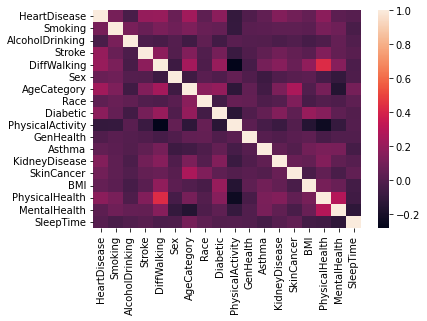

In [31]:
sns.heatmap(corr_matrix)

We notice that there's not significant correlation between our variables. 
Except between:
- PhysicalHealth and DiffWalking (0.42)
- PhysicalHealth and MentalHealth (0.28)

In [32]:
corr_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)

AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64

# Predicting heart disease

In [33]:
df_pred = df.copy()

In [34]:
attributes

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [35]:
attr = attributes[~attributes.isin(["BMI","SleepTime","PhysicalHealth","MentalHealth"])]

## Predicting Heart disease without undersampling

### Dealing with categorical data using a label encoder

In [36]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

#Encoding the features
for feature in attr:
    df_pred[feature]= label_encoder.fit_transform(df_pred[feature])

### Feature scaling

In [66]:
X , y = df_pred.loc[:, df_pred.columns != 'HeartDisease'], df_pred['HeartDisease']

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### Using classification models
We're going to try several algorithms with cross validation on 5 folds:
- Naive Bayes Classifier
- Decision Tree Classifier Without Boosting and Bagging
- Logistic regression
- Linear SVM (Linear SVC)
- K neighbor classifier
- XGBOOST classifier with Bagging and Boosting
- Decision Tree Classifier with Boosting and Bagging


#### ML models

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [40]:
models = [GaussianNB(),DecisionTreeClassifier(max_depth=3, random_state=23),LogisticRegression(random_state = 0),LinearSVC(random_state=0,class_weight='balanced'),KNeighborsClassifier(n_neighbors=8)]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


C:\Users\NITRO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\NITRO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\NITRO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\NITRO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\NITRO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


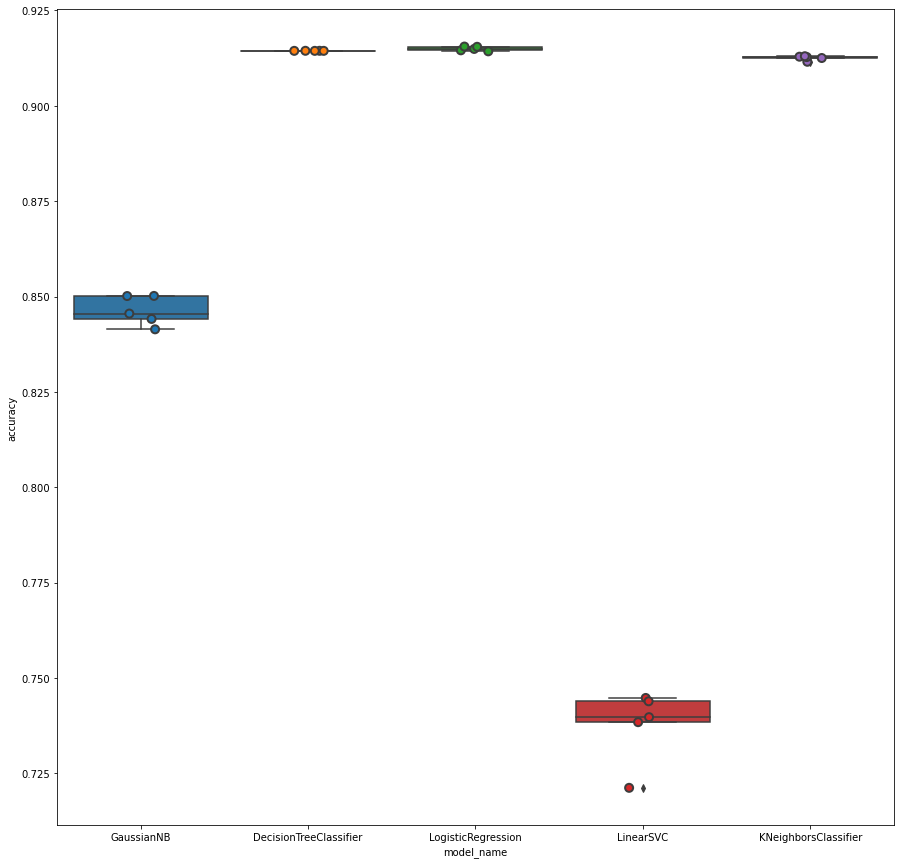

In [41]:
fig = plt.figure(figsize=(15,15)) 
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)


plt.show()

In [42]:
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.914405
GaussianNB                0.846264
KNeighborsClassifier      0.912538
LinearSVC                 0.737594
LogisticRegression        0.914939
Name: accuracy, dtype: float64

We reached the following accuracies

| Model                  	| Accuracy 	|
|:----------------------:	|:--------:	|
| LogisticRegression     	| 0.914939 	|
| DecisionTreeClassifier 	| 0.914405 	|
| KNeighborsClassifier   	| 0.912550 	|
| GaussianNB             	| 0.846264 	|
| LinearSVC              	| 0.737594 	|

#### XGBOOST

In [68]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score


# Init classifier
xgb_cl = xgb.XGBClassifier()

# The baggging ensemble classifier is initialized with:

bagging = BaggingClassifier(base_estimator=xgb_cl, n_estimators=5, max_samples=50, bootstrap=True)

CV = 5

accuracies = cross_val_score(bagging, X, y, scoring='accuracy', cv=CV)

acc = np.mean(accuracies)

C:\Users\NITRO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:40:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:37] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

C:\Users\NITRO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:40:44] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

C:\Users\NITRO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:40:55] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:58] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:41:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:41:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

C:\Users\NITRO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:41:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:41:12] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:41:15] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:41:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

C:\Users\NITRO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:41:22] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:41:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:41:26] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:41:29] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

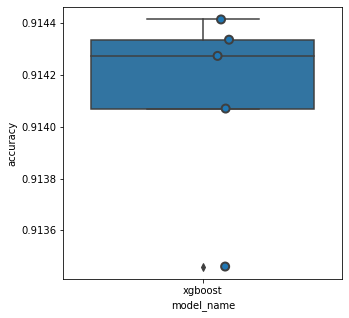

In [69]:
fig = plt.figure(figsize=(5,5))
cv_df = pd.DataFrame(index=range(CV))
entries =[]
for fold_idx, accuracy in enumerate(accuracies):
    entries.append(('xgboost', fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)


plt.show()

In [70]:
acc

0.9141106021044731

With Xgboost we reached a mean accuracy of : 0.9130

#### Decision trees with Boosting and Bagging

In [71]:
tree = DecisionTreeClassifier(max_depth=3, random_state=23)

# The baggging ensemble classifier is initialized with:

bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)

CV = 5

accuracies = cross_val_score(bagging, X, y, scoring='accuracy', cv=CV)

acc = np.mean(accuracies)

In [72]:
acc

0.908885379696368

With Decision trees we reached a mean accuracy of : 0.91

## Predicting Heart disease with undersampling

In [48]:
from imblearn.under_sampling import NeighbourhoodCleaningRule 
ncr = NeighbourhoodCleaningRule(n_neighbors=20, threshold_cleaning=0.5)

In [49]:
X_ncr, y_ncr =ncr.fit_resample(X,y)

In [50]:
sc = StandardScaler()
X_ncr = sc.fit_transform(X_ncr)

### Using the same ML algorithms

In [51]:
models = [GaussianNB(),DecisionTreeClassifier(max_depth=3, random_state=23),LogisticRegression(random_state = 0),LinearSVC(random_state=0,class_weight='balanced'),KNeighborsClassifier(n_neighbors=8)]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_ncr, y_ncr, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


C:\Users\NITRO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\NITRO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\NITRO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\NITRO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\NITRO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


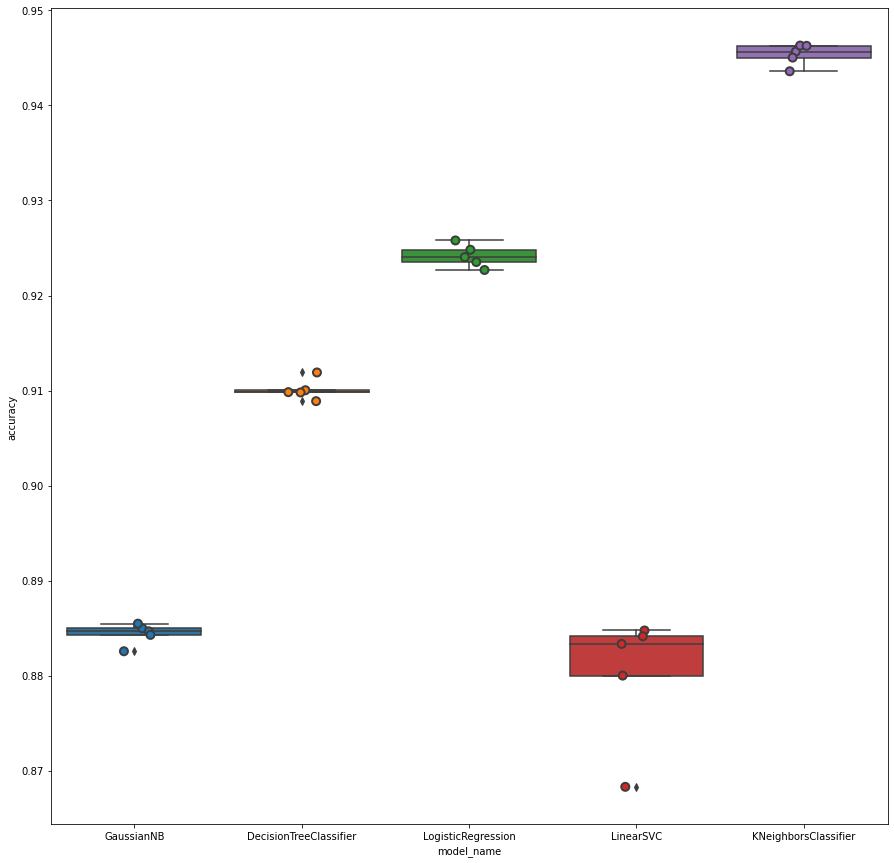

In [52]:
fig = plt.figure(figsize=(15,15)) 
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)


plt.show()

In [53]:
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.910092
GaussianNB                0.884396
KNeighborsClassifier      0.945376
LinearSVC                 0.880111
LogisticRegression        0.924173
Name: accuracy, dtype: float64

Some of the models that we generated on the undersampled dataset have shown better accuracy results

#### XGBOOST

In [64]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score


# Init classifier
xgb_cl = xgb.XGBClassifier()

# The baggging ensemble classifier is initialized with:

bagging = BaggingClassifier(base_estimator=xgb_cl, n_estimators=5, max_samples=50, bootstrap=True)

CV = 5

accuracies = cross_val_score(bagging, X_ncr, y_ncr, scoring='accuracy', cv=CV)

acc = np.mean(accuracies)

C:\Users\NITRO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:53] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

C:\Users\NITRO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:58] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:00] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

C:\Users\NITRO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:39:05] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:06] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

C:\Users\NITRO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:39:12] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:13] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:15] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

C:\Users\NITRO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:39:19] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:22] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

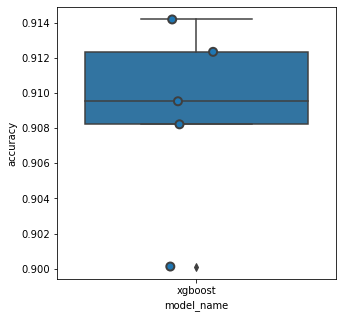

In [73]:
fig = plt.figure(figsize=(5,5))
cv_df = pd.DataFrame(index=range(CV))
entries =[]
for fold_idx, accuracy in enumerate(accuracies):
    entries.append(('xgboost', fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)


plt.show()

In [74]:
acc

0.908885379696368

In [75]:
tree = DecisionTreeClassifier(max_depth=3, random_state=23)

# The baggging ensemble classifier is initialized with:

bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)

CV = 5

accuracies = cross_val_score(bagging, X_ncr, y_ncr, scoring='accuracy', cv=CV)

acc = np.mean(accuracies)

In [76]:
acc

0.8938358356461569

## Let's see how our best models (for undersampling and no undersampling) predict each class

We are using the sklearn function 'cross_val_predict' that gives predictions of each test set using its respective trained model.

### No undersampling best model : Logistic resgression

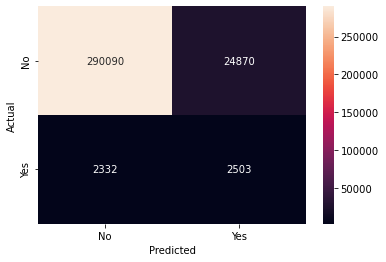

In [59]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

model = LogisticRegression(random_state = 0)

y_pred=cross_val_predict(model,X,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

$ Tpr = \frac{TP}{TP+FN} = 51.76\% $

We can clearly see that the unbalance of the dataset is the reason why we have a good precision score although our True positive rate is at 51% 

### Undersampling best model : KNeighborsClassifier

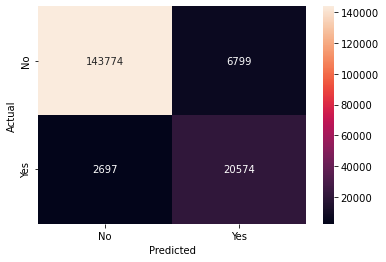

In [61]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

model = KNeighborsClassifier(n_neighbors=8)

y_pred=cross_val_predict(model,X_ncr,y_ncr,cv=5)
conf_mat=confusion_matrix(y_pred,y)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

$ Tpr = \frac{TP}{TP+FN} = 88.41\% $

the undersampling has produce a more accurate model with a high score.

# Conclusion

- Although we couldn't find any significan correlations between our target and the dataset's variables, we managed to reach high precision scores for all our models.
- The undersampling has proven to be very efficient as this method secured higher true positive rate values in comparisson with the training on the full dataset.